In [ ]:
#connect to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Summary Evaluation

Because it was taking too long time to create the summary of the context, so we were continously storing the summary of the each 5 content in the google drive. For evaluation we are reading the data from the stored files.
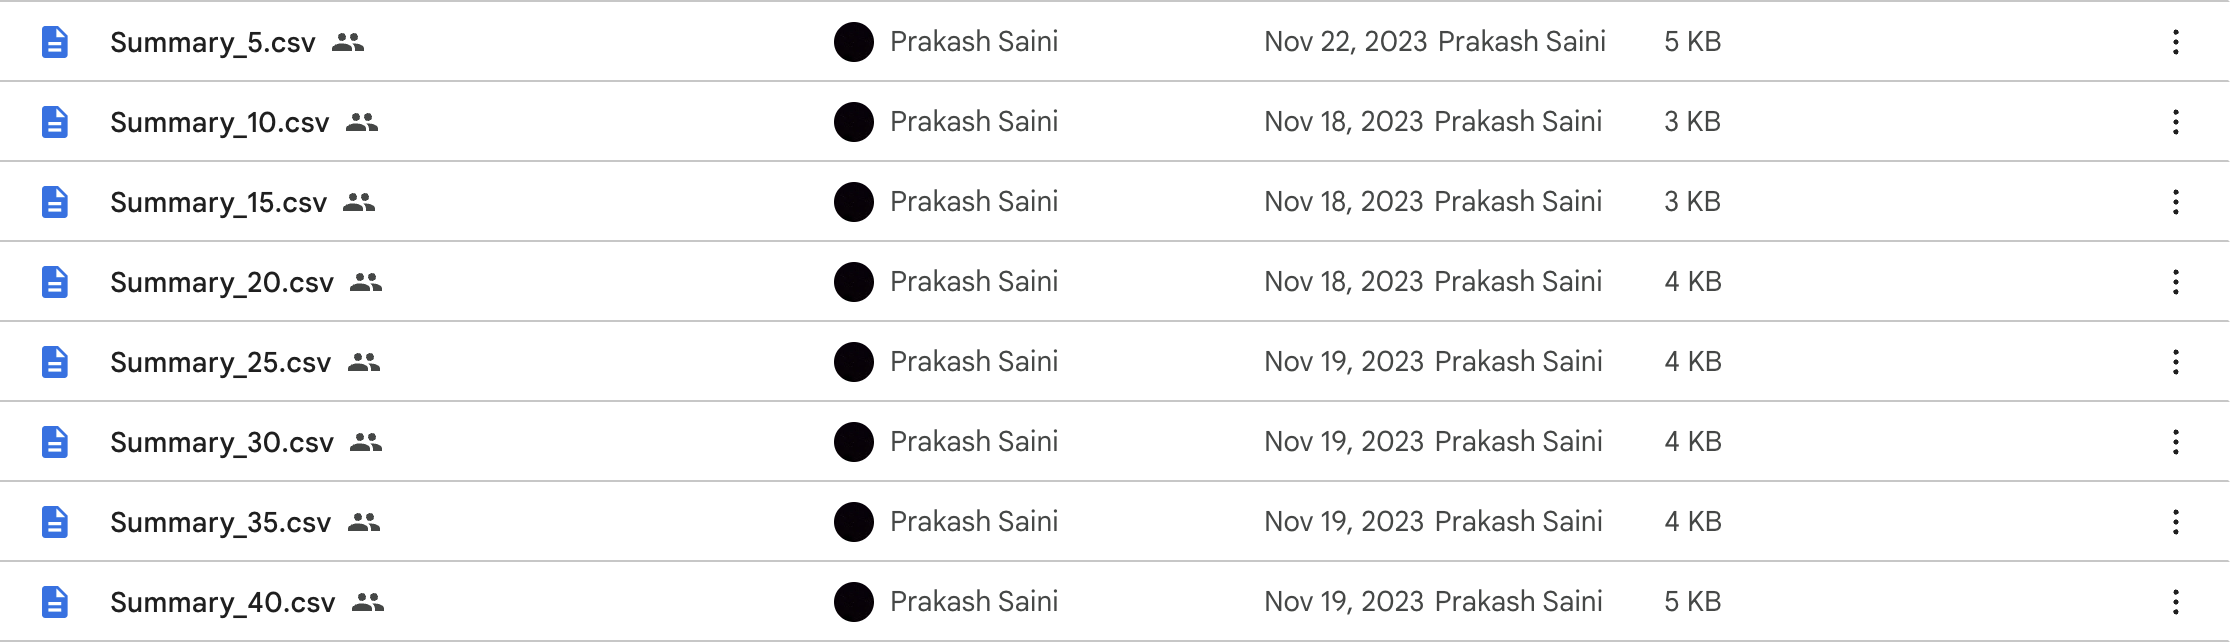

File is stored in the below format.
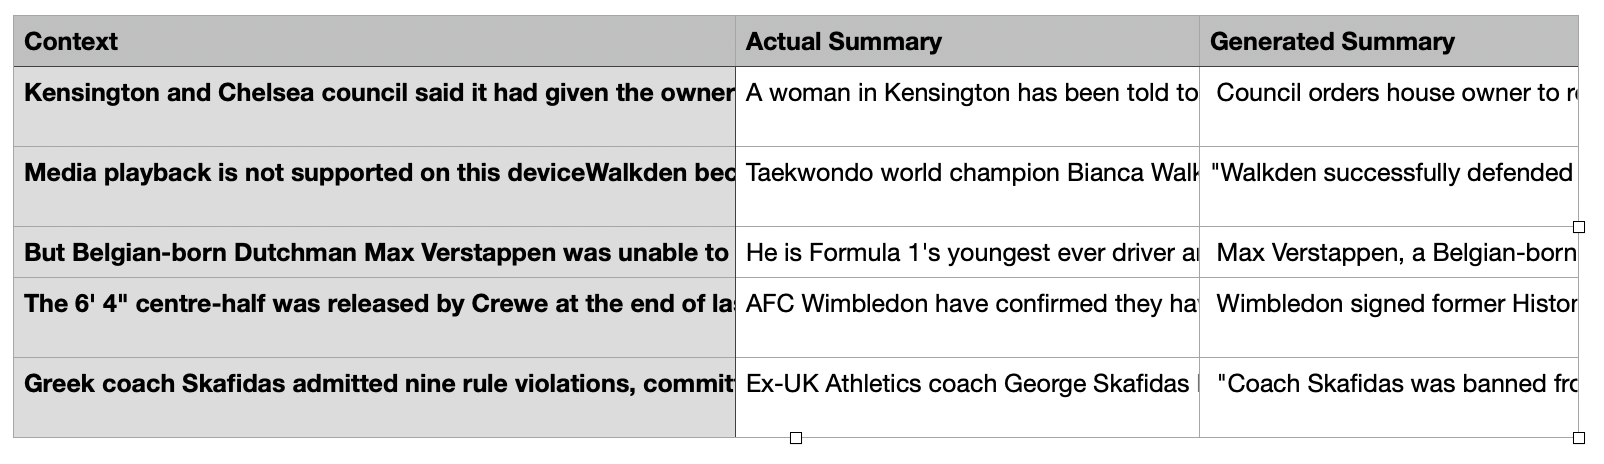


### Top 20

In [ ]:
import pandas as pd
import ast
import re

# Specify the file path
file_path = '/content/drive/MyDrive/'
index = 5 # because first file starts with index 5
refined_generated_summaries=[]
refined_actual_summaries=[]

# iterate through the file with 5 increments with 20 as last index
for fileindex in range(index,21,5):
  filename = f'{file_path}summary_output/Summary_{fileindex}.csv'

  # Read the CSV file into a DataFrame
  df = pd.read_csv(filename)

  # Extract 'Generated Answers' and 'Actual Answers' into lists
  generated_answers_list=df['Generated Summary'].tolist()
  actual_answers_list = df['Actual Summary'].to_list()

  for row in range(len(generated_answers_list)):
    generated_answer=str(generated_answers_list[row])
    actual_answer=str(actual_answers_list[row])
    refined_generated_summaries.append(generated_answer)
    refined_actual_summaries.append(actual_answer)


# Display the lists
print("Generated Summaries:", refined_generated_summaries)
print("Length of the generated summaries: ",len(refined_generated_summaries))
print("\n--------------------------------------\n")
print("Actual Summaries:", refined_actual_summaries)
print("Length of the actual summaries: ",len(refined_actual_summaries))


Generated Summaries: [' Council orders house owner to remove stripes on their home after neighbors complain about its appearance.', ' "Walkden successfully defended his taekwondo world title and spoke about MMA with Jade Jones on Radio 5 live."', ' Max Verstappen, a Belgian-born Dutchman, passed his driving test at the first attempt and will now be able to drink champagne if he ever makes it onto the podium.', ' Wimbledon signed former Histon player Mitchel-King, who suffered injuries last season, for an extensive medical before completing the signing.', ' "Coach Skafidas was banned from UK Athletics for nine rule violations, which destroyed his career."', ' "Officers were called to Bury Old Road in Greater Manchester during Rosh Hashanah celebrations, where a man, aged 45, was arrested for a racially aggravated offense and possessing an offensive weapon. He has been bailed until October."', ' Oates, Gomboc and Nekoda Davis all competed in the European Boxing Championships, with Oates 

### 100>

In [ ]:
import pandas as pd
import ast
import re

# Specify the file path
file_path = '/content/drive/MyDrive/'
index = 5 # because first file starts with index 5
refined_generated_summaries=[]
refined_actual_summaries=[]

# iterate through the file with 5 increments with 120 as last index
for fileindex in range(index,120,5):
  filename = f'{file_path}summary_output/Summary_{fileindex}.csv'

  # Read the CSV file into a DataFrame
  df = pd.read_csv(filename)

  # Extract 'Generated Answers' and 'Actual Answers' into lists
  generated_answers_list=df['Generated Summary'].tolist()
  actual_answers_list = df['Actual Summary'].to_list()

  for row in range(len(generated_answers_list)):
    generated_answer=str(generated_answers_list[row])
    actual_answer=str(actual_answers_list[row])
    refined_generated_summaries.append(generated_answer)
    refined_actual_summaries.append(actual_answer)


# Display the lists
print("Generated Summaries:", refined_generated_summaries)
print("Length of the generated summaries: ",len(refined_generated_summaries))
print("\n--------------------------------------\n")
print("Actual Summaries:", refined_actual_summaries)
print("Length of the actual summaries: ",len(refined_actual_summaries))


Generated Summaries: [' Council orders house owner to remove stripes on their home after neighbors complain about its appearance.', ' "Walkden successfully defended his taekwondo world title and spoke about MMA with Jade Jones on Radio 5 live."', ' Max Verstappen, a Belgian-born Dutchman, passed his driving test at the first attempt and will now be able to drink champagne if he ever makes it onto the podium.', ' Wimbledon signed former Histon player Mitchel-King, who suffered injuries last season, for an extensive medical before completing the signing.', ' "Coach Skafidas was banned from UK Athletics for nine rule violations, which destroyed his career."', ' "Officers were called to Bury Old Road in Greater Manchester during Rosh Hashanah celebrations, where a man, aged 45, was arrested for a racially aggravated offense and possessing an offensive weapon. He has been bailed until October."', ' Oates, Gomboc and Nekoda Davis all competed in the European Boxing Championships, with Oates 

In [ ]:
!pip install rouge nltk bert-score

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 3.6 MB/s eta 0:00:00


In [ ]:
from rouge import Rouge
from nltk.translate.bleu_score import corpus_bleu
from bert_score import score as bert_score

import nltk
nltk.download('punkt')
nltk.download('omw-1.4')
nltk.download('wordnet')

from nltk.tokenize import word_tokenize
from nltk.translate.meteor_score import meteor_score
import numpy as np



# ROUGE
rouge = Rouge()
rouge_results = rouge.get_scores(refined_generated_summaries,refined_actual_summaries, avg=True)
print('\n\n------------------------------\n')
print("ROUGE Scores:", rouge_results)

# BLEU
references = [[summary.split()] for summary in refined_actual_summaries]
hypotheses = [summary.split() for summary in refined_generated_summaries]
bleu_results = corpus_bleu(references, hypotheses)
print('\n------------------------------\n')
print("BLEU Score:", bleu_results)
print('\n------------------------------\n')

# BERTScore
bert_p, bert_r, bert_f1 = bert_score(refined_generated_summaries, refined_actual_summaries, lang='en', verbose=True)
print('\n------------------------------\n')
print("BERTScore Precision:", bert_p.mean().item())
print("BERTScore Recall:", bert_r.mean().item())
print("BERTScore F1 Score:", bert_f1.mean().item())
print('\n------------------------------\n')


# METEORScore
meteor_scores=[]

for index in range(len(refined_generated_summaries)):
  tokenized_generated_summaries = word_tokenize(refined_generated_summaries[index].lower())
  tokenized_actual_summaries = word_tokenize(refined_actual_summaries[index].lower())

  # METEOR
  meteor_scores.append(round(meteor_score([tokenized_generated_summaries],tokenized_actual_summaries),4))


print('\n------------------------------\n')
print("Average METEOR Score: ",np.mean(meteor_scores))
print('\n------------------------------\n')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...




------------------------------

ROUGE Scores: {'rouge-1': {'r': 0.24792586258694618, 'p': 0.1736700694487694, 'f': 0.19728092314390383}, 'rouge-2': {'r': 0.05104030905995923, 'p': 0.033293229454284604, 'f': 0.03868278288499187}, 'rouge-l': {'r': 0.1951879538073329, 'p': 0.1349220823565809, 'f': 0.15406751865213306}}

------------------------------

BLEU Score: 0.01652984219786474

------------------------------



config.json:   0%|          | 0.00/482 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


  0%|          | 0/4 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/2 [00:00<?, ?it/s]

done in 4.66 seconds, 24.67 sentences/sec

------------------------------

BERTScore Precision: 0.857298731803894
BERTScore Recall: 0.8771257996559143
BERTScore F1 Score: 0.8669342994689941

------------------------------


------------------------------

Average METEOR Score:  0.15715304347826087

------------------------------



# Answer Generation Evaluation

Because it was taking too long time to generate the answer of the context and question, so we were continously storing the answers of the each 5 content in the google drive. For evaluation we are reading the data from the stored files.

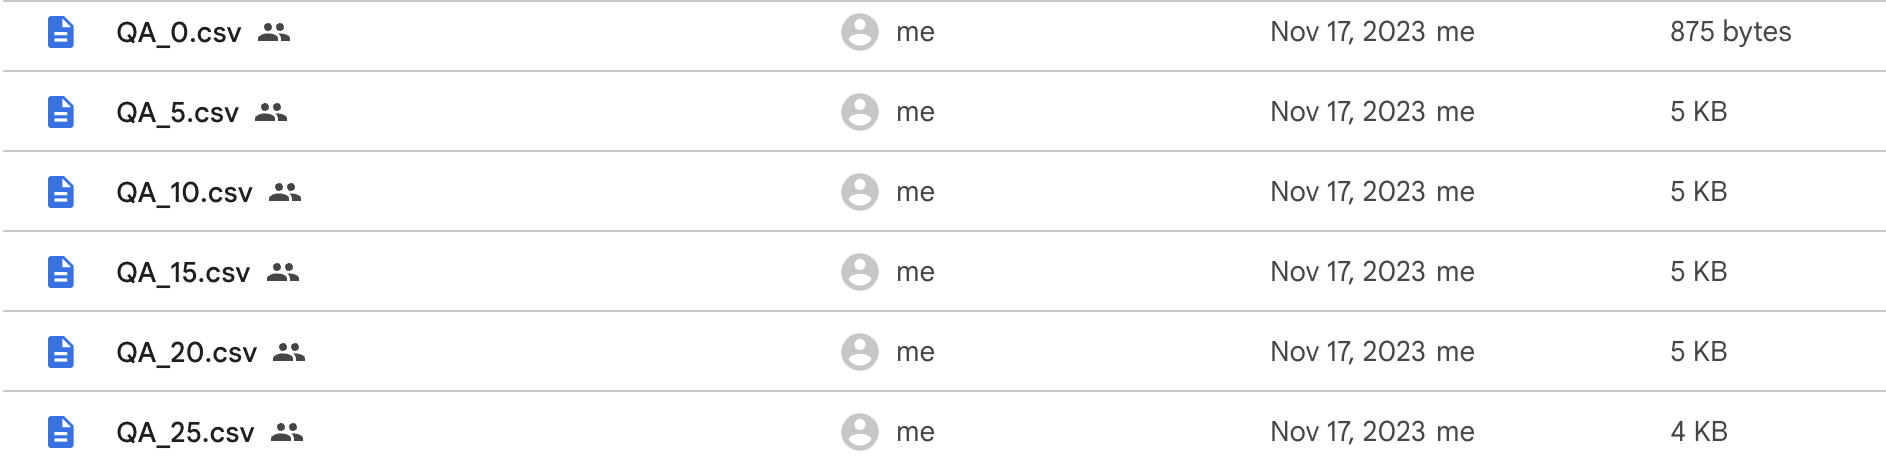

Below is the format of the file:
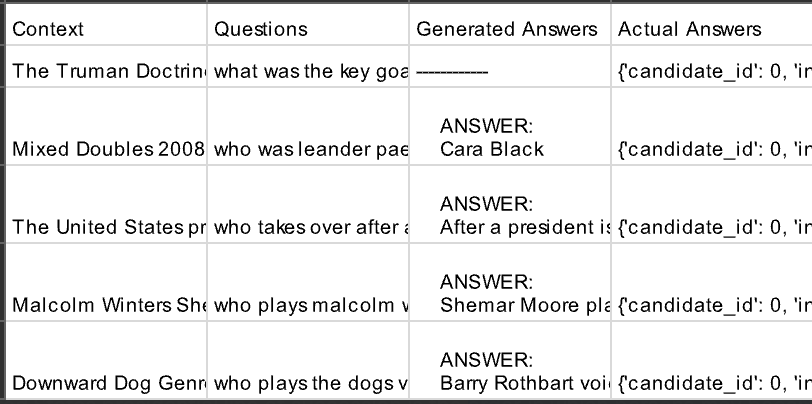

### Top 20

In [ ]:
# code to get the answers from file and store
import pandas as pd
import ast
import re

# Specify the file path
file_path = '/content/drive/MyDrive/'
index = 0  # because first file starts with index 0
refined_generated_answers=[]
refined_actual_answers=[]


# iterate through the file with 5 increments with 20 as last index
for fileindex in range(index,21,5):
  filename = f'{file_path}summary_output/QA_{fileindex}.csv'

  # Read the CSV file into a DataFrame
  df = pd.read_csv(filename)

  # Extract 'Generated Answers' and 'Actual Answers' into lists
  generated_answers_list=df['Generated Answers'].tolist()
  actual_answers_list = df['Actual Answers'].to_list()

  for row in range(len(generated_answers_list)):
    generated_answer=str(generated_answers_list[row])
    actual_answer=str(actual_answers_list[row])

    # refine generated answer
    pattern = re.compile(r'ANSWER:(.*)', re.DOTALL)

    # Find all matches
    matches = pattern.findall(generated_answer)

    if len(matches)==0:
      refined_generated_answers.append('NO ANSWER')
    else :
      # store the result
      refined_generated_answers.append(matches[0].strip())



    # refine actual answer

    # Safely evaluate the string as a Python literal
    parsed_dict = ast.literal_eval(actual_answer)

    # Extract 'span_text' from the parsed dictionary
    answer=parsed_dict.get('span_text', None)
    if len(answer)==0:
      refined_actual_answers.append('NO ANSWER')
    else :
      refined_actual_answers.append(answer)


# Display the lists
print("Generated Answers:", refined_generated_answers)
print("Length of the generated answers: ",len(refined_generated_answers))
print("\n--------------------------------------\n")
print("Actual Answers:", refined_actual_answers)
print("Length of the actual answers: ",len(refined_actual_answers))


Generated Answers: ['Stephanie dies in Grey\'s Anatomy during the episode " Ring of Fire " on May 18, 2017.', 'NO ANSWER', 'Cara Black', 'After a president is impeached, the succession goes in the order of vice president , Speaker of the House of Representatives , President pro tempore of the Senate.', 'Shemar Moore played Malcolm Winters on The Young and the Restless.', 'Barry Rothbart voices the dogs in Downward Dog.', 'The Law of Moses, also called the Mosaic Law or Torat Moshe in Hebrew, refers primarily to the Torah or first five books of the Hebrew Bible.', 'Modem', 'The name of Persia changed to Iran in 1935.', 'NO ANSWER', 'The major nations that had won World War I would have supported the Five-Power Naval Treaty of 1922. These nations were the United Kingdom, the United States, Japan, France, and Italy.', "Instagram's own account has the most followers on Instagram in the world.", 'The term used in mathematics to describe how steep a line is is called the slope or gradient of

### 100>

In [ ]:
# code to get the answers from file and store
import pandas as pd
import ast
import re

# Specify the file path
file_path = '/content/drive/MyDrive/'
index = 0  # because first file starts with index 0
refined_generated_answers=[]
refined_actual_answers=[]


# iterate through the file with 5 increments with 110 as last index
for fileindex in range(index,111,5):
  filename = f'{file_path}summary_output/QA_{fileindex}.csv'

  # Read the CSV file into a DataFrame
  df = pd.read_csv(filename)

  # Extract 'Generated Answers' and 'Actual Answers' into lists
  generated_answers_list=df['Generated Answers'].tolist()
  actual_answers_list = df['Actual Answers'].to_list()

  for row in range(len(generated_answers_list)):
    generated_answer=str(generated_answers_list[row])
    actual_answer=str(actual_answers_list[row])

    # refine generated answer
    pattern = re.compile(r'ANSWER:(.*)', re.DOTALL)

    # Find all matches
    matches = pattern.findall(generated_answer)

    if len(matches)==0:
      refined_generated_answers.append('NO ANSWER')
    else :
      # store the result
      refined_generated_answers.append(matches[0].strip())



    # refine actual answer

    # Safely evaluate the string as a Python literal
    parsed_dict = ast.literal_eval(actual_answer)

    # Extract 'span_text' from the parsed dictionary
    answer=parsed_dict.get('span_text', None)
    if len(answer)==0:
      refined_actual_answers.append('NO ANSWER')
    else :
      refined_actual_answers.append(answer)


# Display the lists
print("Generated Answers:", refined_generated_answers)
print("Length of the generated answers: ",len(refined_generated_answers))
print("\n--------------------------------------\n")
print("Actual Answers:", refined_actual_answers)
print("Length of the actual answers: ",len(refined_actual_answers))


Generated Answers: ['Stephanie dies in Grey\'s Anatomy during the episode " Ring of Fire " on May 18, 2017.', 'NO ANSWER', 'Cara Black', 'After a president is impeached, the succession goes in the order of vice president , Speaker of the House of Representatives , President pro tempore of the Senate.', 'Shemar Moore played Malcolm Winters on The Young and the Restless.', 'Barry Rothbart voices the dogs in Downward Dog.', 'The Law of Moses, also called the Mosaic Law or Torat Moshe in Hebrew, refers primarily to the Torah or first five books of the Hebrew Bible.', 'Modem', 'The name of Persia changed to Iran in 1935.', 'NO ANSWER', 'The major nations that had won World War I would have supported the Five-Power Naval Treaty of 1922. These nations were the United Kingdom, the United States, Japan, France, and Italy.', "Instagram's own account has the most followers on Instagram in the world.", 'The term used in mathematics to describe how steep a line is is called the slope or gradient of

In [ ]:
from rouge import Rouge
from nltk.translate.bleu_score import corpus_bleu
from bert_score import score as bert_score

import nltk
nltk.download('punkt')
nltk.download('omw-1.4')
nltk.download('wordnet')

from nltk.tokenize import word_tokenize
from nltk.translate.meteor_score import meteor_score
import numpy as np



# ROUGE
rouge = Rouge()
rouge_results = rouge.get_scores(refined_generated_answers,refined_actual_answers, avg=True)
print('\n\n------------------------------\n')
print("ROUGE Scores:", rouge_results)

# BLEU
references = [[summary.split()] for summary in refined_actual_answers]
hypotheses = [summary.split() for summary in refined_generated_answers]
bleu_results = corpus_bleu(references, hypotheses)
print('\n------------------------------\n')
print("BLEU Score:", bleu_results)
print('\n------------------------------\n')

# BERTScore
bert_p, bert_r, bert_f1 = bert_score(refined_generated_answers, refined_actual_answers, lang='en', verbose=True)
print('\n------------------------------\n')
print("BERTScore Precision:", bert_p.mean().item())
print("BERTScore Recall:", bert_r.mean().item())
print("BERTScore F1 Score:", bert_f1.mean().item())
print('\n------------------------------\n')


# METEORScore
meteor_scores=[]

for index in range(len(refined_generated_answers)):
  tokenized_generated_answers = word_tokenize(refined_generated_answers[index].lower())
  tokenized_actual_answers = word_tokenize(refined_actual_answers[index].lower())

  # METEOR
  meteor_scores.append(round(meteor_score([tokenized_generated_answers],tokenized_actual_answers),4))


print('\n------------------------------\n')
print("Average METEOR Score: ",np.mean(meteor_scores))
print('\n------------------------------\n')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!




------------------------------

ROUGE Scores: {'rouge-1': {'r': 0.5136853976659801, 'p': 0.17315893150061784, 'f': 0.22105160481843839}, 'rouge-2': {'r': 0.2630409136624476, 'p': 0.0988414138140228, 'f': 0.11872942389971192}, 'rouge-l': {'r': 0.5068661651185922, 'p': 0.17195786343925945, 'f': 0.21916652883376955}}

------------------------------

BLEU Score: 0.07335536942736223

------------------------------



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


  0%|          | 0/3 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/2 [00:00<?, ?it/s]

done in 2.14 seconds, 48.21 sentences/sec

------------------------------

BERTScore Precision: 0.8311617374420166
BERTScore Recall: 0.8627310991287231
BERTScore F1 Score: 0.8456557393074036

------------------------------


------------------------------

Average METEOR Score:  0.16813883495145632

------------------------------



### Chatgpt Comaprison

We gave the context and questions to the chatgpt and stored that in the `chatgpt_answers.csv` file.

In [ ]:
# read answers generated by chatgpt
# code to get the answers from file and store
import pandas as pd
import ast
import re

# Specify the file path
file_path = '/content/drive/MyDrive/summary_output/chatgpt_answers.csv'
chatgpt_generated_answers=[]

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Extract 'Answers' into lists
chatgpt_generated_answers=df['Answer'].tolist()

# Display the lists
print("Chatgpt Generated Answers:", chatgpt_generated_answers)
print("Length of the chatgpt generated answers: ",len(chatgpt_generated_answers))


Chatgpt Generated Answers: ['Stephanie Edwards dies in "Ring of Fire" (13.24) on May 18, 2017, in Grey\'s Anatomy.', 'The key goal of the Truman Doctrine was to counter Soviet geopolitical expansion during the Cold War, providing support to nations threatened by Soviet communism.', "Leander Paes' partner in the mixed doubles at the US Open in 2008 was Cara Black, and they became the champions.", 'After a president is impeached, the vice president takes over according to the United States presidential line of succession.', 'Malcolm Winters on The Young and the Restless is played by Shemar Moore.', 'In Downward Dog, the voice of the dog is played by Samm Hodges.', 'The Book of Laws in the Bible refers primarily to the Torah or the first five books of the Hebrew Bible.', 'The common name for a modulator-demodulator is a modem.', 'The name of Persia officially changed to Iran on the Nowruz of 1935.', 'The tsunami in Japan in 2011, following the Tōhoku earthquake, lasted approximately 6 min

In [ ]:
from rouge import Rouge
from nltk.translate.bleu_score import corpus_bleu
from bert_score import score as bert_score

import nltk
nltk.download('punkt')
nltk.download('omw-1.4')
nltk.download('wordnet')

from nltk.tokenize import word_tokenize
from nltk.translate.meteor_score import meteor_score
import numpy as np

# evaluating for top 101 answers
refined_generated_answers=refined_generated_answers[:101]
chatgpt_generated_answers=chatgpt_generated_answers[:101]
print("Evaluating on refined answers len: ",len(refined_generated_answers))
print("Evaluating on chatgpt answers len: ",len(chatgpt_generated_answers))


# ROUGE
rouge = Rouge()
rouge_results = rouge.get_scores(refined_generated_answers,chatgpt_generated_answers, avg=True)
print('\n\n------------------------------\n')
print("ROUGE Scores:", rouge_results)

# BLEU
references = [[summary.split()] for summary in chatgpt_generated_answers]
hypotheses = [summary.split() for summary in refined_generated_answers]
bleu_results = corpus_bleu(references, hypotheses)
print('\n------------------------------\n')
print("BLEU Score:", bleu_results)
print('\n------------------------------\n')

# BERTScore
bert_p, bert_r, bert_f1 = bert_score(refined_generated_answers, chatgpt_generated_answers, lang='en', verbose=True)
print('\n------------------------------\n')
print("BERTScore Precision:", bert_p.mean().item())
print("BERTScore Recall:", bert_r.mean().item())
print("BERTScore F1 Score:", bert_f1.mean().item())
print('\n------------------------------\n')


# METEORScore
meteor_scores=[]

for index in range(len(refined_generated_answers)):
  tokenized_generated_answers = word_tokenize(refined_generated_answers[index].lower())
  tokenized_actual_answers = word_tokenize(chatgpt_generated_answers[index].lower())

  # METEOR
  meteor_scores.append(round(meteor_score([tokenized_generated_answers],tokenized_actual_answers),4))


print('\n------------------------------\n')
print("Average METEOR Score: ",np.mean(meteor_scores))
print('\n------------------------------\n')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Evaluating on refined answers len:  101
Evaluating on chatgpt answers len:  101


------------------------------

ROUGE Scores: {'rouge-1': {'r': 0.42698786729032134, 'p': 0.46380910435753053, 'f': 0.40688358172533995}, 'rouge-2': {'r': 0.3041691829346788, 'p': 0.3098969993972887, 'f': 0.28350459667260874}, 'rouge-l': {'r': 0.400718924351391, 'p': 0.43733717116702775, 'f': 0.3813536133729504}}

------------------------------

BLEU Score: 0.23073293529094938

------------------------------



config.json:   0%|          | 0.00/482 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


  0%|          | 0/3 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/2 [00:00<?, ?it/s]

done in 6.60 seconds, 15.30 sentences/sec

------------------------------

BERTScore Precision: 0.889926552772522
BERTScore Recall: 0.8917843699455261
BERTScore F1 Score: 0.8902422189712524

------------------------------


------------------------------

Average METEOR Score:  0.43005049504950493

------------------------------



# Question Generation Evaluation

Because it was taking too long time to generate the answer of the context and question, so we were continously storing the answers of the each 5 content in the google drive. For evaluation we are reading the data from the stored files.
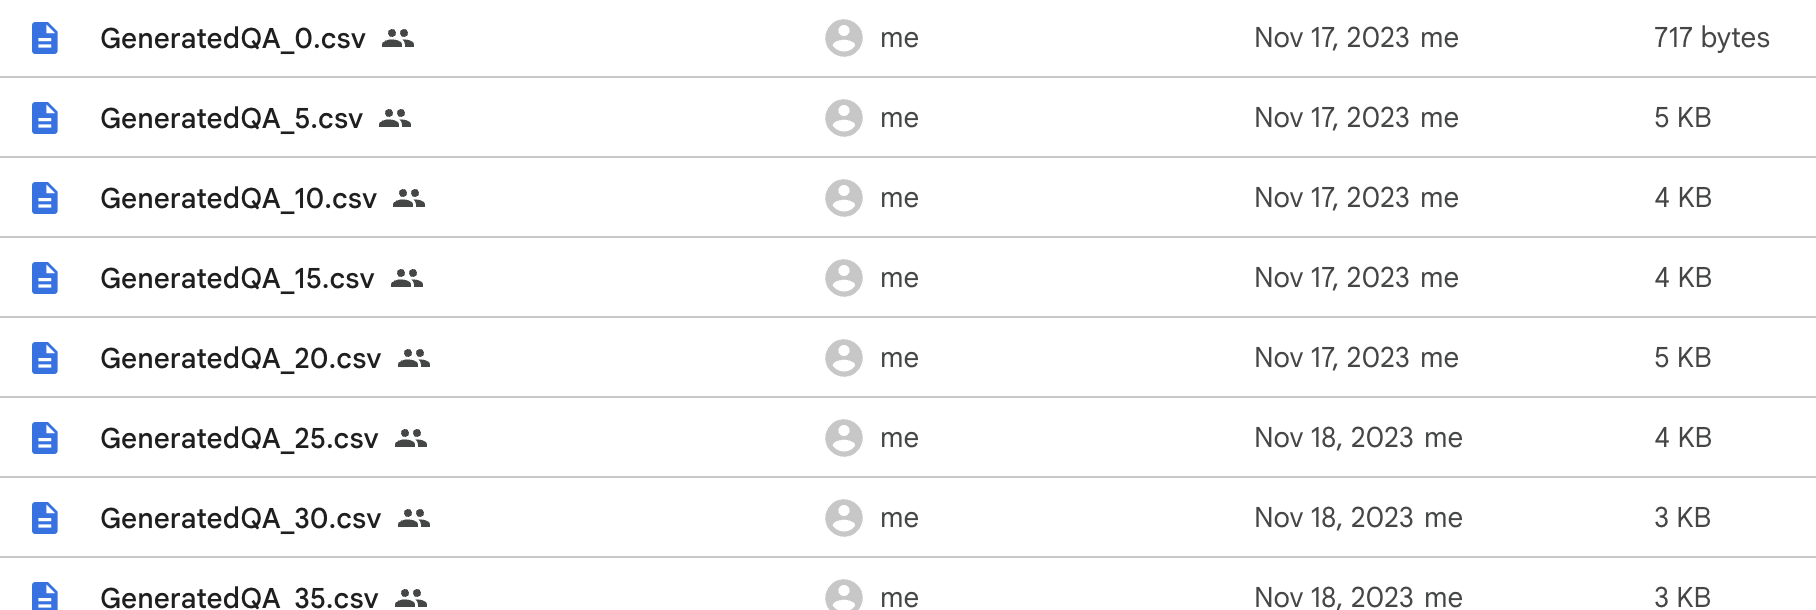


It's in the below format:

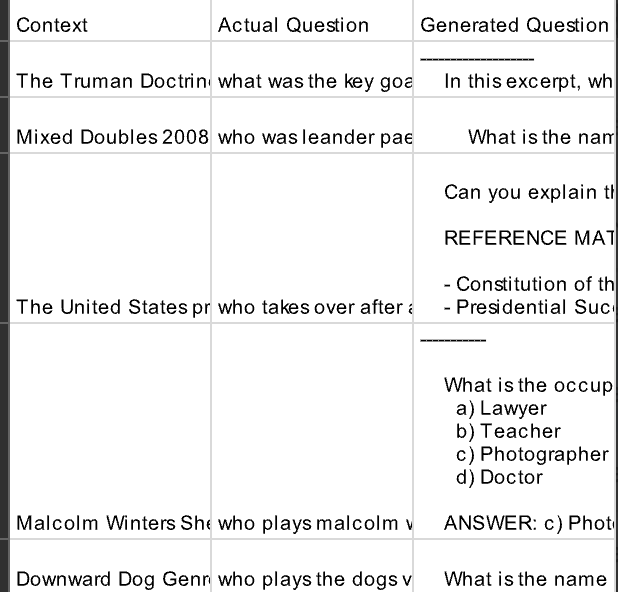

In [ ]:
def extract_questions(text):
    # Split the text into sentences
    sentences = re.split(r'\n', text)

    # Extract sentences containing a question mark
    question_sentences = [sentence.strip() for sentence in sentences if re.search(r'\?', sentence)]

    # Join the extracted sentences into a single string
    if len(question_sentences)==0:
      return 'NO QUESTION'

    return question_sentences[0]

### Top 20

In [ ]:
import pandas as pd
import ast
import re

# Specify the file path
file_path = '/content/drive/MyDrive/'
index = 0  # because first file starts with index 0
refined_generated_questions=[]
refined_actual_questions=[]


# iterate through the file with 5 increments with 20 as last index
for fileindex in range(index,21,5):
  filename = f'{file_path}summary_output/GeneratedQA_{fileindex}.csv'

  # Read the CSV file into a DataFrame
  df = pd.read_csv(filename)

  # Extract 'Generated Answers' and 'Actual Answers' into lists
  generated_questions_list=df['Generated Question'].tolist()
  actual_questions_list = df['Actual Question'].to_list()

  for row in range(len(generated_questions_list)):
    generated_question=str(generated_questions_list[row])
    actual_question=str(actual_questions_list[row])
    refined_actual_questions.append(actual_question)
    refined_generated_questions.append(extract_questions(generated_question))

# Display the lists
print("Generated Questions:", refined_generated_questions)
print("Length of the generated questions: ",len(refined_generated_questions))
print("\n--------------------------------------\n")
print("Actual Questions:", refined_actual_questions)
print("Length of the actual questions: ",len(refined_actual_questions))


Generated Questions: ["What is the name of the character played by Jerrika Hinton in Grey's Anatomy?", "In this excerpt, what was the main purpose of President Harry S. Truman's speech?", 'What is the name of the event where Cara Black and Leander Paes finished as runners up in 2008?', 'Can you explain the order of succession in the United States presidential line of succession as per the Constitution and Presidential Succession Act of 1947?', 'What is the occupation of Malcolm Winters in The Young and the Restless?', 'What is the name of the production company that created "Downward Dog" and what type of television network did it originally air on?', 'What are the primary sources of information in the Law of Moses, also known as the Mosaic Law or Torat Moshe?', 'How does a modem work?', 'Which word did Reza Shah Pahlavi use to refer to Iran before the Nowruz of 1935, and how has it affected the terms for Iranian nationality and citizenship?', 'NO QUESTION', 'Which treaty was also know

### 100>

In [ ]:
import pandas as pd
import ast
import re

# Specify the file path
file_path = '/content/drive/MyDrive/'
index = 0  # because first file starts with index 0
refined_generated_questions=[]
refined_actual_questions=[]

# iterate through the file with 5 increments with 110 as last index
for fileindex in range(index,111,5):
  filename = f'{file_path}summary_output/GeneratedQA_{fileindex}.csv'

  # Read the CSV file into a DataFrame
  df = pd.read_csv(filename)

  # Extract 'Generated Answers' and 'Actual Answers' into lists
  generated_questions_list=df['Generated Question'].tolist()
  actual_questions_list = df['Actual Question'].to_list()

  for row in range(len(generated_questions_list)):
    generated_question=str(generated_questions_list[row])
    actual_question=str(actual_questions_list[row])
    refined_actual_questions.append(actual_question)
    refined_generated_questions.append(extract_questions(generated_question))

# Display the lists
print("Generated Questions:", refined_generated_questions)
print("Length of the generated questions: ",len(refined_generated_questions))
print("\n--------------------------------------\n")
print("Actual Questions:", refined_actual_questions)
print("Length of the actual questions: ",len(refined_actual_questions))


Generated Questions: ["What is the name of the character played by Jerrika Hinton in Grey's Anatomy?", "In this excerpt, what was the main purpose of President Harry S. Truman's speech?", 'What is the name of the event where Cara Black and Leander Paes finished as runners up in 2008?', 'Can you explain the order of succession in the United States presidential line of succession as per the Constitution and Presidential Succession Act of 1947?', 'What is the occupation of Malcolm Winters in The Young and the Restless?', 'What is the name of the production company that created "Downward Dog" and what type of television network did it originally air on?', 'What are the primary sources of information in the Law of Moses, also known as the Mosaic Law or Torat Moshe?', 'How does a modem work?', 'Which word did Reza Shah Pahlavi use to refer to Iran before the Nowruz of 1935, and how has it affected the terms for Iranian nationality and citizenship?', 'NO QUESTION', 'Which treaty was also know

In [ ]:
from rouge import Rouge
from nltk.translate.bleu_score import corpus_bleu
from bert_score import score as bert_score

import nltk
nltk.download('punkt')
nltk.download('omw-1.4')
nltk.download('wordnet')

from nltk.tokenize import word_tokenize
from nltk.translate.meteor_score import meteor_score
import numpy as np



# ROUGE
rouge = Rouge()
rouge_results = rouge.get_scores(refined_generated_questions,refined_actual_questions, avg=True)
print('\n\n------------------------------\n')
print("ROUGE Scores:", rouge_results)

# BLEU
references = [[summary.split()] for summary in refined_actual_questions]
hypotheses = [summary.split() for summary in refined_generated_questions]
bleu_results = corpus_bleu(references, hypotheses)
print('\n------------------------------\n')
print("BLEU Score:", bleu_results)
print('\n------------------------------\n')

# BERTScore
bert_p, bert_r, bert_f1 = bert_score(refined_generated_questions, refined_actual_questions, lang='en', verbose=True)
print('\n------------------------------\n')
print("BERTScore Precision:", bert_p.mean().item())
print("BERTScore Recall:", bert_r.mean().item())
print("BERTScore F1 Score:", bert_f1.mean().item())
print('\n------------------------------\n')


# METEORScore
meteor_scores=[]

for index in range(len(refined_generated_questions)):
  tokenized_generated_questions = word_tokenize(refined_generated_questions[index].lower())
  tokenized_actual_questions = word_tokenize(refined_actual_questions[index].lower())

  # METEOR
  meteor_scores.append(round(meteor_score([tokenized_generated_questions],tokenized_actual_questions),4))


print('\n------------------------------\n')
print("Average METEOR Score: ",np.mean(meteor_scores))
print('\n------------------------------\n')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!




------------------------------

ROUGE Scores: {'rouge-1': {'r': 0.2361564361564361, 'p': 0.15203560202988115, 'f': 0.1767230166492411}, 'rouge-2': {'r': 0.06524089024089025, 'p': 0.03936441592610871, 'f': 0.04707721789928592}, 'rouge-l': {'r': 0.21475311475311473, 'p': 0.1398120033589141, 'f': 0.16196860527357101}}

------------------------------

BLEU Score: 0.0197914663554128

------------------------------



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


  0%|          | 0/4 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/2 [00:00<?, ?it/s]

done in 1.45 seconds, 76.51 sentences/sec

------------------------------

BERTScore Precision: 0.8544443249702454
BERTScore Recall: 0.8653174638748169
BERTScore F1 Score: 0.8596585988998413

------------------------------


------------------------------

Average METEOR Score:  0.1785801801801802

------------------------------

